In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.compose import ColumnTransformer
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

In [4]:
df = pd.read_csv('../data/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Import train test split
from sklearn.model_selection import train_test_split

In [19]:
# Define our X and y
X = df.drop(columns=['price','date'])
y = df['price']

In [15]:
# Train test split
# Use test_size=0.25, random_state=42


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
cat_cols = [c for c in X.columns if X[c].dtype == 'O']
cat_cols

['waterfront', 'view', 'condition', 'grade', 'sqft_basement']

In [23]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [25]:
train_df.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.003204,0.006234,-0.009448,-0.138699,0.021945,-0.006620,0.017996,-0.011866,-0.006180,-0.002316,0.021098,-0.001934,-0.144438,-0.020316
bedrooms,0.003204,1.000000,0.530802,0.593719,0.039381,0.182357,0.492576,0.155514,0.017621,-0.152890,-0.014104,0.134689,0.406226,0.034535,0.321212
bathrooms,0.006234,0.530802,1.000000,0.760773,0.089418,0.503681,0.690267,0.495821,0.058335,-0.196306,0.031525,0.219310,0.573682,0.087665,0.535071
sqft_living,-0.009448,0.593719,0.760773,1.000000,0.183421,0.352124,0.876812,0.313008,0.053075,-0.196310,0.051976,0.242544,0.760405,0.192398,0.701469
sqft_lot,-0.138699,0.039381,0.089418,0.183421,1.000000,-0.004557,0.190645,0.057133,0.004376,-0.131100,-0.079332,0.233358,0.153001,0.707752,0.087953
floors,0.021945,0.182357,0.503681,0.352124,-0.004557,1.000000,0.523269,0.488199,0.006687,-0.058223,0.049980,0.126320,0.280233,-0.009358,0.256883
sqft_above,-0.006620,0.492576,0.690267,0.876812,0.190645,0.523269,1.000000,0.420487,0.020070,-0.256847,-0.001818,0.345686,0.736261,0.199594,0.601325
yr_built,0.017996,0.155514,0.495821,0.313008,0.057133,0.488199,0.420487,1.000000,-0.225119,-0.348325,-0.153226,0.412844,0.321551,0.075290,0.046539
yr_renovated,-0.011866,0.017621,0.058335,0.053075,0.004376,0.006687,0.020070,-0.225119,1.000000,0.078862,0.032245,-0.078018,0.005127,0.006546,0.132368
zipcode,-0.006180,-0.152890,-0.196306,-0.196310,-0.131100,-0.058223,-0.256847,-0.348325,0.078862,1.000000,0.268237,-0.564487,-0.274854,-0.151004,-0.048724


<AxesSubplot:>

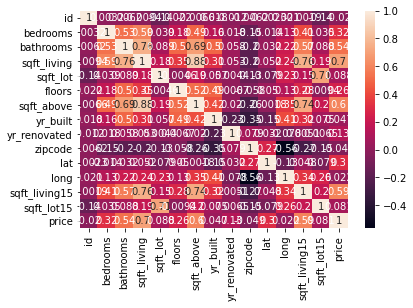

In [26]:
sns.heatmap(train_df.corr(), annot=True)

In [27]:
import statsmodels.api as sm

In [31]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19709,4083306045,5,3.75,3330,5042,2.0,NaN,AVERAGE,Average,9 Better,2470,860.0,2014,0.0,98103,47.6497,-122.339,1780,3990
4800,2022059308,3,2.00,1678,13862,1.0,NO,NONE,Average,7 Average,1678,0.0,1994,0.0,98030,47.3744,-122.190,1550,11753
13225,2623039018,4,1.00,1550,15239,1.5,YES,EXCELLENT,Average,6 Low Average,1370,180.0,1930,NaN,98166,47.4502,-122.378,1790,22047
16111,8923600185,3,2.50,2760,9471,1.0,NO,AVERAGE,Average,8 Good,1760,1000.0,1956,0.0,98115,47.6760,-122.272,3040,6765
17711,5511600315,2,1.50,1400,5810,2.0,NO,NONE,Average,7 Average,1400,0.0,1940,0.0,98103,47.6843,-122.341,1470,3920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,3,2.50,2230,5800,2.0,NO,NONE,Average,7 Average,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
21575,4140940150,4,2.75,2770,3852,2.0,NO,NONE,Average,8 Good,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641
5390,8658300480,4,1.50,1530,9000,1.0,NO,NONE,Good,6 Low Average,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500
860,1723049033,1,0.75,380,15000,1.0,NO,NONE,Average,5 Fair,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


In [32]:
# Let's use the OLS method
# Set up and fit the model

simple_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).